# Milestone 2
---

## 1. Perkenalan
- Name  : Ghaffar Farros
- Batch : HCK 019
- Objective : membuat sebuah model Machine Learning dengan menggunakan algoritma klasifikasi untuk melakukan prediksi cuaca. Dalam kasus ini akan menggunakan beberapa metode agar dapat dibandingkan hasil prediksi mana yang memberikan hasil paling optimal. Selanjutnya model akan dievaluasi dengan metrik `F1 Score` yang bertujuan meminimalisir False Negative (misal memprediksi bahwa tidak akan turun hujan padahal sebenarnya hujan) dan False Positive (misal prediksi akan turun hujan padahal sebenarnya tidak hujan) dengan menyeimbangkan perhitungan recall dan precision. Model terbaik kan di tuning pada hyperparameternya, lalu digunakan pada data inference.

### Background 

Dalam era data dan teknologi informasi yang terus berkembang, prediksi cuaca telah menjadi salah satu aspek krusial yang mempengaruhi berbagai sektor, salah satunya bagi penyedia jasa traveling. Penting dilakukan upaya untuk meningkatkan performa prediksi cuaca melalui penerapan metode machine learning. Hal ini akan dijadikan bahan pertimbangan ketika akan menjalankan beberapa proyek penting yang perlu memahami cuaca yang fluktuatif.

Sebagai Data Scientist di salah satu travel company, dikembangkan proyek yang bertujuan untuk meningkatkan prediksi cuaca guna mengoptimalkan pengalaman pelanggan dan operasional perusahaan. Perusahaan kemudian menjalin kerja sama dengan Badan Meteorologi, Klimatologi, dan Geofisika (BMKG) untuk mengembangkan model prediksi cuaca yang lebih handal.

Tujuan dari kolaborasi ini adalah untuk meminimalkan error dengan memanfaatkan data historis cuaca dari BMKG dan model machine learning. Dengan pendekatan ini, diharapkan prediksi cuaca yang dihasilkan dapat lebih akurat dan dapat diandalkan, sehingga pelanggan dapat membuat keputusan yang lebih baik terkait perjalanan mereka dan perusahaan dapat mengoptimalkan layanan serta operasionalnya.

### Problem Statement Exploration

- Bagaimana Persentase tipe cuaca yang diamati pada dataset?
- Bagaimana kondisi perbedaan cuaca berdasarkan lokasinya?
- Bagaimana frekuensi cuaca pada setiap musimnya?
- Bagaimana perbandingan Indeks UV pada setiap tutupan awan?
- Apakah musim berpengaruh pada cuaca?

## 2. Import Libraries

In [1]:
#data manipulation
import pandas as pd 
import numpy as np
from scipy import stats

# visual
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

#feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from feature_engine.outliers import Winsorizer
from scipy.stats import kendalltau, pearsonr, spearmanr, chi2_contingency, f_oneway

#Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

#Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

#Model Evaluation
from sklearn.metrics import  f1_score
from sklearn.model_selection import GridSearchCV, cross_val_score

#Model Saving
import pickle

#adds
import warnings
warnings.filterwarnings('ignore')

## 3. Data Loading

- Dataset : `weather_classification_data.csv`
- Description : Dataset ini berisi informasi mengenai kondisi metrik-metrik yang berkaitan dengan cuaca yang meliputi suhu udara, kelembapan, kecepatan angin, persentase curah hujan, cakupan awan, tekanan atmosfer, indeks sinar UV, musim, jarak pandang, lokasi pengukuran, dan tipe cuaca
- Variables:


| **Column**            | **Description**                                                                                           |
|-----------------------|-----------------------------------------------------------------------------------------------------------|
| **Temperature**       | Temperatur/suhu dalam derajat Celsius.                        |
| **Humidity**          | Persentase kelembapan.                         |
| **Wind Speed**        | Kecepatan angin dalam kilometer per jam.                |
| **Precipitation (%)** | Persentase curah hujan.                                                           |
| **Cloud Cover**       | Deskripsi tutupan awan.                                                                                   |
| **Atmospheric Pressure** | Tekanan atmosfer dalam hPa.                                               |
| **UV Index**          | Indeks UV, yang menunjukkan kekuatan radiasi ultraviolet.                                                  |
| **Season**            | Musim saat data direkam.                                                                                   |
| **Visibility (km)**   | Jarak pandang dalam kilometer.                      |
| **Location**          | Jenis lokasi tempat data direkam.                                                                         |
| **Weather Type**      | Menunjukkan jenis cuaca (variabel `target` untuk klasifikasi).                                           |


In [6]:
DF = pd.read_csv('weather_classification_data.csv')
DF.head(40)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [3]:
#rename kolom lebih simple
DF.rename(columns={'Precipitation (%)': 'Precipitation', 'Visibility (km)': 'Visibility'}, inplace=True)

In [4]:
#cek missing value
print(f'terdapat {DF.shape} baris dan kolom\n')
print('missing value tiap kolom:')
DF.isnull().sum()

terdapat (13200, 11) baris dan kolom

missing value tiap kolom:


Temperature             0
Humidity                0
Wind Speed              0
Precipitation           0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility              0
Location                0
Weather Type            0
dtype: int64

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation         13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility            13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
DF.duplicated().sum()

0

Berikut informasi yang bisa diperoleh pada data yang telah di loading:
- Data berisi informasi mengenai metrik-metrik yang berkaitan dengan cuaca, seperti temperatur, kelembapan, dll.
- Data memiliki 13200 baris dan 11 kolom
- Target dari data ini adalah `Weather Type`
- Tidak ditemukan data kosong
- Tidak ditemukan data duplikasi
- Data type sudah sesuai masing-masing kolom

## 4. Exploratory Data Analysis (EDA)

### Persentase tipe cuaca yang diamati pada dataset

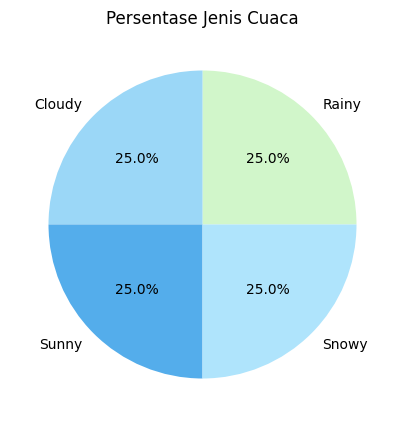

In [7]:
#Custom warna
custom = ['#D1F6CA', '#9BD7F7', '#54ADEB', '#AFE4FC', '#127CDD']

# Hitung persentase
total = DF['Weather Type'].value_counts()
weather_percentage = (total / total.sum()) * 100

# Pie chart
plt.figure(figsize=(5,5))
palette = sns.color_palette(custom, len(weather_percentage))
plt.pie(weather_percentage, labels=weather_percentage.index, autopct='%1.1f%%', colors=palette)
plt.title('Persentase Jenis Cuaca')
plt.show()

Visualisasi diatas menunjukkan persentase total cuaca yang diamati. Pada keempat cuaca yang diamati, dataset ini menunjukkan jumlah yang seimbang antara berawan, hujan, cerah, dan bersalju. Perlu diperhatikan juga meskipun jumlahnya seimbang, distribusi jenis cuaca dapat bervariasi berdasarkan variabel lain seperti lokasi dan musim. Analisis lebih lanjut diperlukan untuk memahami pola cuaca spesifik dan pengaruhnya terhadap faktor-faktor lain.

Berkaitan dengan model machine learning, data diatas menunjukkan hasil yang seimbang ketika ingin memprediksi cuaca (sebagai target), mengindikasikan data yang balance dan sesuai untuk model machine learning. Keseimbangan ini membantu dalam pelatihan model yang lebih stabil dan mengurangi kemungkinan bias terhadap kelas tertentu. Namun, penting juga untuk mempertimbangkan variabel tambahan dan melakukan validasi silang untuk memastikan generalisasi yang baik pada data yang tidak terlihat.

### Kondisi perbedaan cuaca berdasarkan lokasi

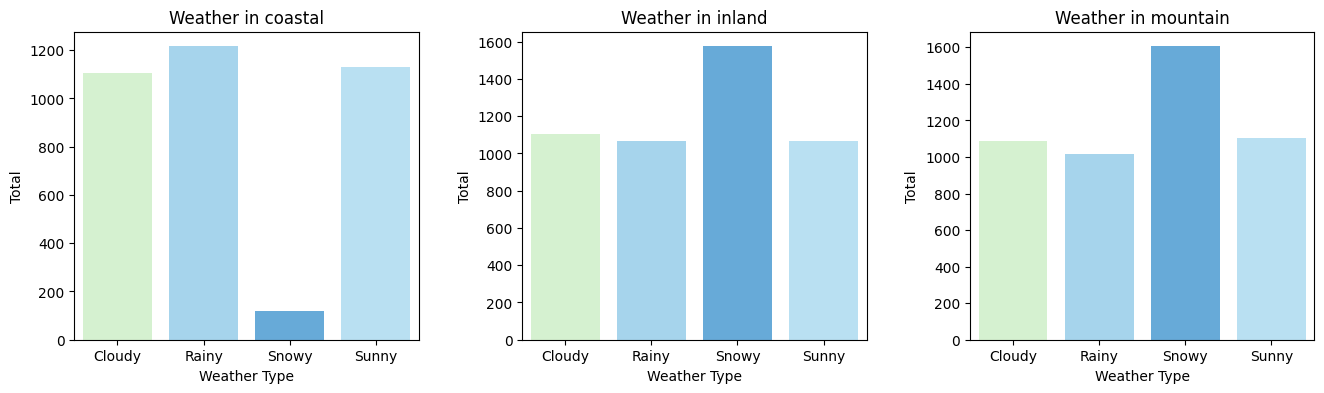

In [8]:
#querying data
DX = pd.DataFrame(DF.groupby(["Location",'Weather Type']).size()).reset_index()
DX.columns = ['Location', 'Weather Type', 'Total']
coastal = DX.query('Location == "coastal"')
inland = DX.query('Location == "inland"')
mountain = DX.query('Location == "mountain"')

#plotting
plt.figure(figsize=(16, 4))

plt.subplot(1, 3, 1)
sns.barplot(data=coastal, x='Weather Type', y='Total', hue='Weather Type', palette=custom)
plt.title('Weather in coastal')
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 3, 2)
sns.barplot(data=inland, x='Weather Type', y='Total', hue='Weather Type', palette=custom)
plt.title('Weather in inland')
plt.subplots_adjust(wspace=0.3)

plt.subplot(1, 3, 3)
sns.barplot(data=mountain, x='Weather Type', y='Total', hue='Weather Type', palette=custom)
plt.title('Weather in mountain')
plt.subplots_adjust(wspace=0.3)
plt.show()

Grafik ini menunjukkan tiga bar plot yang membandingkan berbagai jenis cuaca di tiga wilayah yang berbeda: pesisir, daratan, dan pegunungan.

- Coastal (Pesisir):
    - Berawan: Sekitar 1100 kejadian.
    - Hujan: Jenis cuaca paling umum dengan sekitar 1200.
    - Bersalju: Paling jarang dengan sekitar 100.
    - Cerah: Cukup umum dengan sekitar 1100 kejadian.

- Inland (Daratan):
    - Berawan: Sekitar 1100 kejadian.
    - Hujan: dibawah 1100 kejadian.
    - Bersalju: besar, sekitar 1500 kejadian.
    - Cerah: Sekitar 1100 kejadian.

- Mountain (Pegunungan):
    - Berawan: Sekitar 1000 kejadian.
    - Hujan: Sekitar 1000 kejadian.
    - Bersalju: Paling besar, dengan sekitar 1600 kejadian.
    - Cerah: Sekitar 1100 kejadian.

Dapat disimpulkan, wilayah pegunungan memiliki cuaca bersalju yang paling banyak disusul dengan daratan, sementara wilayah bersalju paling sedikit terletak di pesisir. Kejadian hujan, berawan, dan cerah tidak berbeda jauh pada setiap lokasinya. Business insight: Pengembangan paket wisata musiman sesuai lokasi  misal ski/snowboard di lokasi pegunungan, informasi tren cuaca dan preferensi wisatawan.

### Perbandingan Indeks UV pada setiap tutupan awan

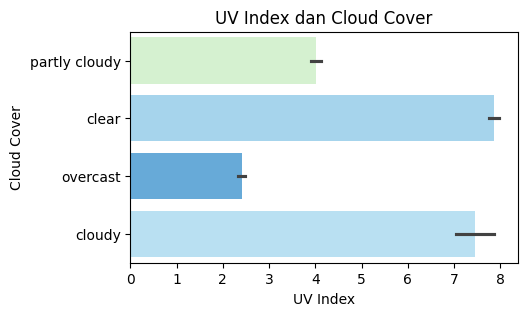

In [9]:
#plotting
plt.figure(figsize=(5,3))
sns.barplot(data=DF, x='UV Index', y='Cloud Cover', palette=custom)
plt.title('UV Index dan Cloud Cover')
plt.show()

Dari hasil visualisasi diatas dapat diamati beberapa jenis tutupan awan dengan masing-masing UV indexnya. Jenis tutupan awan dengan UV index paling tunggi terdapat pada clear (cerah), sementara UV index yang paling rendah berada ketika awan tertutup keseluruhan. Business insight: Promosi aktivitas outdoor saat kondisi sesuai, alternatif kegiatan indoor, informasi UV Index dalam panduan wisata

### Apakah musim berpengaruh pada cuaca?

In [10]:
contingency_table = pd.crosstab(DF['Season'],DF['Weather Type'])
result = stats.chi2_contingency(contingency_table)
print("P-value:",result.pvalue)

P-value: 0.0


Berikut merupakana hipotesis yang dibuat berdasarkan kasus diatas:
- H0 : Tidak ada hubungan antara musim dan tipe cuaca
- H1 : Ada hubungan antara musim dan tipe cuaca

Pada perhitungan diketahui nilai p-value < dari 0.05 yang menandakan H0 ditolak dan H1 diterima. Artinya terdapat hubungan yang signifikan antara musim dengan tipe cuaca. Ini menunjukkan bahwa perbedaan musim mempengaruhi jenis cuaca yang terjadi di daerah tersebut. Business insight: pengembangan paket/produk musiman, kampanye musiman.

### Frekuensi cuaca pada setiap musimnya

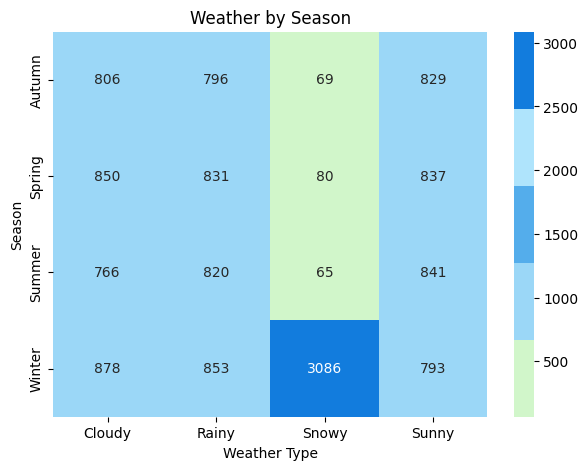

In [11]:
#create pivot
heatmap_data = pd.crosstab(DF['Season'], DF['Weather Type'])

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(heatmap_data, annot=True, cmap=custom, fmt='d')
plt.title('Weather by Season')
plt.show()

Pada heatmap diatas dapat diamati frekuensi cuaca berdasarkan musimnya. Perbedaan nilai signifikan ditunjukkan cuaca snowy yang jumlahnya tinggi pada saat `Winter`, dan juga sangat sedikit ketika musim-musim lainnya. Cuaca lainnya terjadi relatif konstan pada beberapa musim lainnya dengan beberapa cuaca yang sedikit lebih tinggi dibanding lainya, seperti Sunny saat `Summer` dan `Autumn` dan Cloudy saat `Spring`. Business insight: penawaran khusus untuk kegiatan musiman, paket wisata atau aktivitas ringan, informasi edukatif terupdate untuk pelanggan

## 5. Feature Engineering

### Cardinality

In [12]:
#set kolom lebih terbuka
pd.set_option('display.max_colwidth', None)

# Cek Cardinality
container = []
for col in DF.columns:
  container.append([col, DF[col].nunique(), DF[col].unique()])

cardinal = pd.DataFrame(columns=['kolom', 'nunique', 'unique_values'], data=container)
cardinal

,kolom,nunique,unique_values
0,Temperature,126,"[14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0, 28.0, 35.0, 12.0, -10.0, 24.0, 10.0, 33.0, 43.0, 13.0, -7.0, 26.0, 4.0, 17.0, 40.0, 2.0, 15.0, 29.0, 11.0, -9.0, 36.0, 42.0, 21.0, 22.0, 25.0, -4.0, -1.0, -5.0, 41.0, 31.0, 16.0, 34.0, 49.0, 19.0, 23.0, 20.0, -3.0, 18.0, 1.0, 0.0, 46.0, 44.0, -13.0, -6.0, 78.0, 63.0, 73.0, 8.0, -12.0, -24.0, -8.0, 60.0, 48.0, 5.0, 51.0, -14.0, 50.0, 37.0, 54.0, 47.0, 70.0, 9.0, 66.0, -16.0, -15.0, 59.0, 80.0, -19.0, 52.0, 45.0, 6.0, -18.0, -11.0, 74.0, 76.0, 55.0, -20.0, 57.0, 91.0, 82.0, -17.0, 61.0, 7.0, 53.0, 65.0, 77.0, 67.0, 64.0, 58.0, 68.0, 72.0, 62.0, 71.0, ...]"
1,Humidity,90,"[73, 96, 64, 83, 74, 55, 97, 85, 45, 43, 59, 87, 21, 50, 27, 51, 46, 102, 67, 88, 36, 79, 72, 57, 61, 70, 95, 69, 90, 105, 49, 37, 22, 54, 66, 25, 91, 98, 94, 41, 84, 63, 75, 52, 89, 47, 81, 62, 31, 68, 35, 78, 56, 93, 44, 38, 24, 82, 65, 80, 39, 48, 60, 29, 99, 92, 76, 77, 86, 32, 58, 42, 30, 100, 33, 71, 107, 108, 26, 106, 28, 109, 101, 34, 103, 40, 23, 104, 53, 20]"
2,Wind Speed,97,"[9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 2.0, 10.5, 15.0, 6.5, 0.5, 12.0, 12.5, 7.5, 13.5, 1.0, 4.0, 16.0, 16.5, 2.5, 23.0, 3.0, 10.0, 25.5, 19.0, 11.5, 0.0, 9.0, 18.5, 11.0, 20.0, 14.0, 5.5, 13.0, 46.5, 5.0, 18.0, 28.5, 14.5, 4.5, 15.5, 28.0, 19.5, 21.5, 34.0, 17.5, 47.0, 34.5, 35.5, 23.5, 42.5, 33.0, 31.5, 26.0, 22.0, 36.5, 27.5, 20.5, 35.0, 30.0, 26.5, 21.0, 32.5, 32.0, 24.0, 27.0, 22.5, 31.0, 30.5, 24.5, 29.5, 37.0, 44.5, 41.0, 41.5, 40.5, 37.5, 46.0, 25.0, 39.0, 29.0, 45.0, 43.5, 45.5, 36.0, 38.0, 44.0, 38.5, 33.5, 40.0, 42.0, 47.5, 39.5, 43.0, 48.5]"
3,Precipitation,110,"[82.0, 71.0, 16.0, 66.0, 26.0, 86.0, 96.0, 107.0, 25.0, 67.0, 8.0, 46.0, 13.0, 27.0, 15.0, 72.0, 75.0, 98.0, 18.0, 29.0, 101.0, 85.0, 62.0, 12.0, 3.0, 54.0, 97.0, 63.0, 56.0, 91.0, 6.0, 76.0, 109.0, 58.0, 37.0, 9.0, 0.0, 39.0, 11.0, 14.0, 88.0, 78.0, 55.0, 90.0, 4.0, 69.0, 68.0, 32.0, 87.0, 17.0, 89.0, 57.0, 41.0, 84.0, 83.0, 47.0, 99.0, 92.0, 19.0, 60.0, 65.0, 5.0, 43.0, 2.0, 59.0, 79.0, 94.0, 42.0, 53.0, 73.0, 81.0, 52.0, 36.0, 45.0, 21.0, 22.0, 40.0, 50.0, 51.0, 10.0, 35.0, 95.0, 103.0, 7.0, 74.0, 48.0, 61.0, 64.0, 31.0, 106.0, 93.0, 24.0, 1.0, 80.0, 23.0, 70.0, 20.0, 104.0, 77.0, 30.0, ...]"
4,Cloud Cover,4,"[partly cloudy, clear, overcast, cloudy]"
5,Atmospheric Pressure,5456,"[1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1010.03, 990.87, 984.46, 999.44, 1012.13, 879.88, 1029.16, 1016.08, 986.19, 1018.88, 1000.44, 1016.38, 1009.18, 1025.8, 1012.25, 991.53, 980.31, 1014.29, 1012.02, 1017.94, 982.53, 1010.16, 1020.73, 1018.15, 1007.75, 991.07, 995.74, 984.63, 1009.36, 1012.09, 1026.81, 996.17, 991.68, 1132.2, 1017.27, 1013.99, 1028.63, 1018.86, 1028.55, 1019.41, 1016.5, 1014.34, 1010.34, 1019.42, 981.26, 1017.49, 1014.49, 990.72, 984.11, 991.65, 997.97, 1017.89, 1018.56, 1074.07, 996.12, 1011.96, 992.45, 1009.01, 996.85, 1007.84, 995.4, 1017.16, 1025.22, 993.14, 1026.15, 983.36, 1017.74, 1063.39, 1013.61, 1022.53, 1027.53, 1018.98, 992.83, 1009.48, 1006.67, 1017.82, 1029.09, 983.83, 1019.92, 999.46, 1160.48, 999.99, 1022.48, 1014.4, 995.63, 1008.0, 1009.12, 1018.44, 853.01, 824.71, 1026.94, 1000.74, 1023.62, 981.02, 1013.85, ...]"
6,UV Index,15,"[2, 7, 5, 1, 0, 8, 11, 3, 9, 4, 13, 10, 14, 6, 12]"
7,Season,4,"[Winter, Spring, Summer, Autumn]"
8,Visibility,41,"[3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 7.5, 1.5, 8.5, 6.0, 8.0, 3.0, 9.5, 9.0, 4.5, 2.0, 16.5, 12.5, 6.5, 7.0, 0.0, 17.5, 17.0, 13.0, 11.0, 0.5, 16.0, 18.0, 10.5, 11.5, 19.0, 18.5, 13.5, 15.5, 15.0, 14.5, 14.0, 12.0, 20.0, 19.5]"
9,Location,3,"[inland, mountain, coastal]"


Semua fitur dapat dikategorikan cardinality rendah. Kardinalitas rendah secara umum tidak menyebabkan masalah sehingga hasil encoding tidak berpotensi menghasilkan dimensionality yang berlebih, yang bisa menyebabkan model berisiko overfitting.


### Split Train Test

In [13]:
#pisah dulu train sama testnya
x = DF.drop(columns='Weather Type')
y = DF['Weather Type']

#split train & test set
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=7)

print(x_train.shape)
print(x_test.shape)

(10560, 10)
(2640, 10)


Membagi data latih (train) sebesar 80% dari total data yang digunakan untuk pembelajaran model, dan data uji (test) sebesar 20% yang tidak disertakan dalam proses pelatihan. Tujuan dari proses ini adalah untuk memeriksa kinerja model yang baru dibuat. Semakin baik model, semakin tahan terhadap semua jenis data yang belum pernah dilihatnya.

### Handling Outliers

- Split Numcol & Catcol

In [14]:
#memisahkan kolom numerik dan kategorik untuk memudahkan
numcols = x_train.select_dtypes(include=np.number).columns.to_list()
catcols = x_train.select_dtypes(include='object').columns.to_list()

In [15]:
#pengecekan kemiringan distribusi
container = []
for i in numcols:
    skewnes = x_train[i].skew()
    if skewnes >= -0.5 and skewnes <= 0.5:
        container.append('Normal')
    elif (skewnes > 0.5 and skewnes <= 1) or (skewnes < -0.5 and skewnes > -1):
        container.append('Skew')
    else:
        container.append('Extreme Skew')

data = {'Kolom': numcols,
        'Skewness' : container
}
df_skew = pd.DataFrame(data=data)
df_skew

,Kolom,Skewness
0,Temperature,Normal
1,Humidity,Normal
2,Wind Speed,Extreme Skew
3,Precipitation,Normal
4,Atmospheric Pressure,Normal
5,UV Index,Skew
6,Visibility,Extreme Skew


In [16]:
# Define function untuk cek histogram dan boxplot
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(6,2))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30,kde=True)
    plt.title('Histogram')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.subplots_adjust(wspace=0.3)
    plt.show()

**Before**

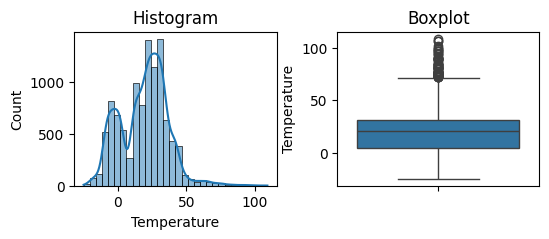

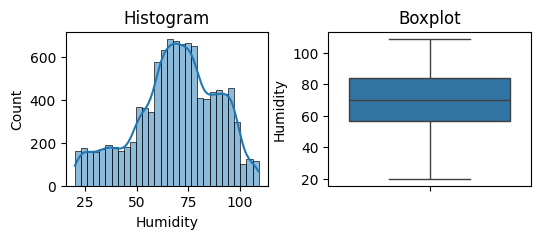

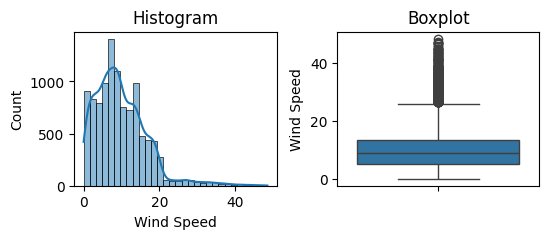

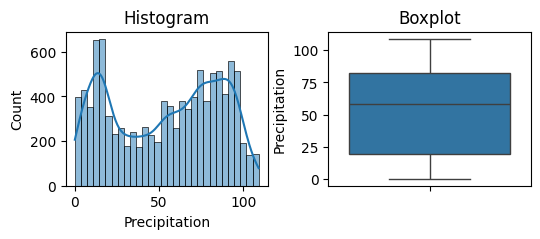

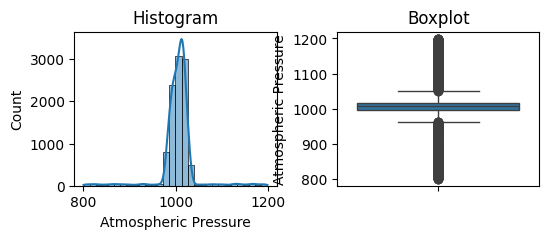

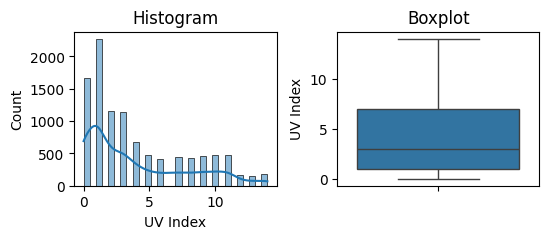

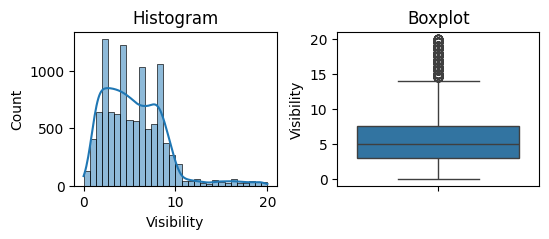

In [17]:
# Historgram & Boxplot before handling
for i in numcols:
    diagnostic_plots(x_train, i)

**Handling with Winsorizer**

In [18]:
#normal
winsor_norm = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=['Temperature','Humidity','Precipitation','Atmospheric Pressure'],
                            missing_values='ignore')

x_train_capped = winsor_norm.fit_transform(x_train)
x_test_capped = winsor_norm.transform(x_test)

#skew
winsor_skew = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=['UV Index'],
                            missing_values='ignore')

x_train_capped = winsor_skew.fit_transform(x_train_capped)
x_test_capped = winsor_skew.transform(x_test_capped)

#extreme
winsor_ext = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=3,
                            variables=['Wind Speed', 'Visibility'],
                            missing_values='ignore')

x_train_capped = winsor_ext.fit_transform(x_train_capped)
x_test_capped = winsor_ext.transform(x_test_capped)

**After**

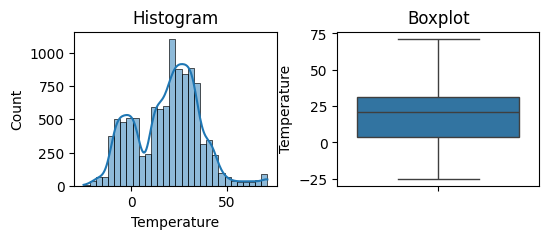

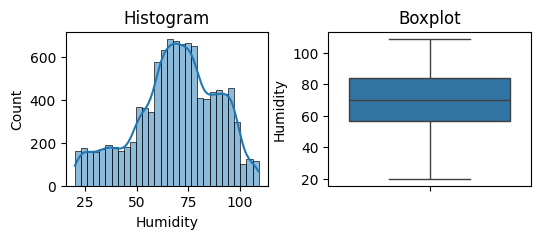

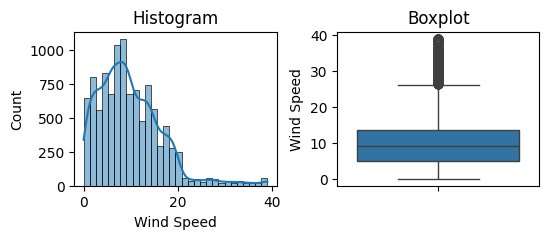

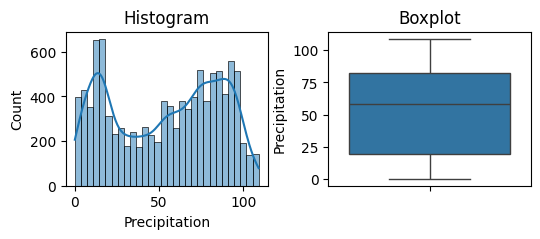

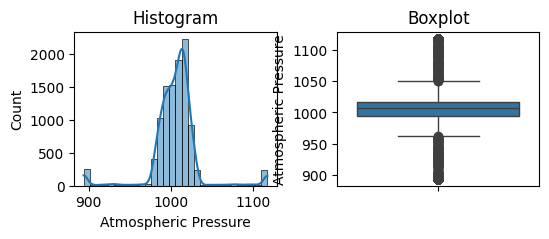

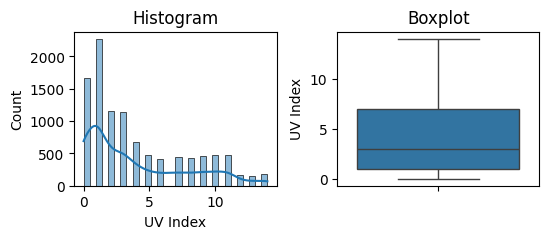

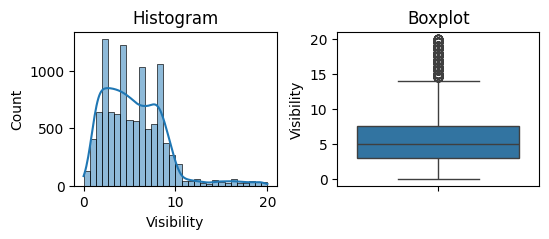

In [19]:
#Histogram dan Boxplot after capping
for i in numcols:
    diagnostic_plots(x_train_capped, i)

- Capping:
Metode capping dengan winsorizer digunakan untuk membatasi nilai outlier ke batas tertentu. pertimbangan metode ini adalah agar dapat mengurangi pengaruh outlier pada distribusi data, menjaga struktur dan keseimbangan data, serta menghasilkan model yang lebih konsisten.

- Before:
Pengecekan skewness untuk menentukan jenis distribusi data dan nantinya cara untuk handling outliernya, pengecekan ini ditujukan hanya untuk kolom dengan tipe numerikal. Hasil menunjukkan distribusi bervariasi dari normal, skew, dan extreme skew.

- After:
Setelah dilakukan penghapusan outlier, maka histogram tampak lebih merata. Mencerminkan perbaikan pada distribusi data dan variasi harga yang lebih konsisten dibandingkan sebelumnya.

### Handling Missing Value

In [20]:
# Pengecekan data kosong di train
x_train_capped.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation           0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility              0
Location                0
dtype: int64

In [21]:
# Pengecekan data kosong di test
x_test_capped.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation           0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility              0
Location                0
dtype: int64

Pada dataset tidak terdapat missing value, maka data dapat digunakan dengan lengkap untuk melatih dan menguji model klasifikasi. Diharapkan dengan data yang clean dapat memaksimalkan akurasi dan keandalan model dengan data riil tanpa imputasi.

### Feature Selection

In [22]:
#fungsi pengecekan korelasi antara x dan y
def cor_func(kol, meth):
    interpretasi = []
    cols = []

    for col in kol:
        if meth == chi2_contingency:
            contingency_table = pd.crosstab(x_train_capped[col], y_train)
            chi2_stat, p_value, _, _ = meth(contingency_table)
        elif meth == spearmanr or pearsonr:
            corr_stat, p_value = meth(x_train_capped[col], y_train)
        elif meth == f_oneway:
            f_stat, p_value = meth(x_train_capped[col], y_train)
        elif meth == kendalltau:
            k_stat, p_value = meth(x_train_capped[col], y_train)
        
        cols.append(col)

        if p_value < 0.05:
            interpretasi.append('berkorelasi')
        else:
            interpretasi.append('tidak ada korelasi')

    korelasi = pd.DataFrame({'nama kolom': cols,
                             'hasil': interpretasi})
    return korelasi

In [23]:
#cek korelasi numerikal-kategorikal
cor_func(numcols, kendalltau)

,nama kolom,hasil
0,Temperature,berkorelasi
1,Humidity,berkorelasi
2,Wind Speed,berkorelasi
3,Precipitation,berkorelasi
4,Atmospheric Pressure,berkorelasi
5,UV Index,berkorelasi
6,Visibility,berkorelasi


In [24]:
#cek korelasi kategorikal-kategorikal
cor_func(catcols, chi2_contingency)

,nama kolom,hasil
0,Cloud Cover,berkorelasi
1,Season,berkorelasi
2,Location,berkorelasi


Hasil analisa korelasi menunjukkan semua fitur baik numerikal maupun kategorikal memiliki korelasi dengan targetnya. Hal ini menunjukkan bahwa semua variabel ini memiliki kontribusi penting dalam model prediksi atau analisis yang dilakukan, relevan, dan dapat memberikan informasi yang berharga untuk memahami atau memprediksi variabel target. Oleh karena itu, tidak ada variabel yang bisa diabaikan/diseleksi.

## 6. Model Definition

### Conceptual Problems

**Latar belakang adanya bagging dan cara kerja bagging:**
- `Latar belakang` : Bagging berasal dari gabungan metode Bootstrapping dan Aggregation untuk membentuk satu model ensemble
- `Cara kerja` : Paralel. Melakukan Bootstrapping (teknik pengambilan sampel dengan pengembalian), model dilatih secar independen, Prediksi dari setiap model kemudian digabungkan (agregasi), bisa dengan rata-rata atau dengan jumlah mayoritas.

**Perbedaan cara kerja algoritma Random Forest dengan Gradient Boosting**
- `Random Forest` : Dilakukan secara Paralel. Menggunakan teknik Bagging dimana mengambil data secara paralel pada setiap subset, melatih secara independen masing-masing, menyebabkan variansi hasil yang kemudian diagregasi dengan voting.
- `Gradient Boost` : Dilakukan secara Sekuensial. Menggunakan teknik boosting dimana melatih model secara bertahap, di mana setiap model baru mencoba memperbaiki kesalahan prediksi dari model sebelumnya dengan meminimalkan fungsi kerugian menggunakan gradien. Prediksi dari semua model kemudian digabungkan dengan rata-rata berbobot. 

**Penjelasan Cross Validation**<br>
Cross validation merupakan metode yang digunakan saat evaluasi model dengan membagi data menjadi beberapa lipatan (fold) untuk melatih dan menguji model secara bergantian, hal tersebut ditujukan agar bisa mengukur kinerja model secara lebih konsisten sehingga dapat mengurangi risiko overfitting.

### Column Transformer

In [25]:
# buat column transformer
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, numcols),
    ('pipe_cat', cat_pipeline, catcols)
])

### Pipeline

In [26]:
# K-Nearest Neighbors
KNN_pipe =  Pipeline([
    ('transformer', preprocessing_pipeline),
    ('KNN', KNeighborsClassifier())])

# SVM
SVM_pipe =  Pipeline([
    ('transformer', preprocessing_pipeline),
    ('SVM', SVC(random_state=42))])

# Decision Tree
DT_pipe =  Pipeline([
    ('transformer', preprocessing_pipeline),
    ('DT', DecisionTreeClassifier(random_state=42))])

# Random Forest 
RF_pipe =  Pipeline([
    ('transformer', preprocessing_pipeline),
    ('RF', RandomForestClassifier(random_state=42))])

# Gradient Boost
boost_pipe =  Pipeline([
    ('transformer', preprocessing_pipeline),
    ('boost', GradientBoostingClassifier(random_state=42))])

Berikut penjelasan proses diatas:
- Pipeline digunakan untuk otomatisasi proses transformasi data dan pelatihan model, dengan menggabungkan beberapa langkah didalamnya
- Digunakan column transformer untuk memisahkan scaling dan encoding (jika tidak maka keduanya akan dilakukan karena sequensial)
- Definisi model menggunakan 5 jenis berbeda untuk dibandingkan, kemudian sesuai parameternya yang memiliki sifat random diset random_state agar hasil tidak berubah-ubah

## 7. Model Training

In [27]:
# Fitting pipe model KNN
KNN_pipe.fit(x_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation',
                                                   'Atmospheric Pressure',
                                                   'UV Index', 'Visibility']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('KNN', KNeighborsClassifier())])

In [28]:
# Fitting pipe model SVM/SVC
SVM_pipe.fit(x_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation',
                                                   'Atmospheric Pressure',
                                                   'UV Index', 'Visibility']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('SVM', SVC(random_state=42))])

In [29]:
# Fitting pipe model Decision Tree
DT_pipe.fit(x_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation',
                                                   'Atmospheric Pressure',
                                                   'UV Index', 'Visibility']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('DT', DecisionTreeClassifier(random_state=42))])

In [30]:
# Fitting pipe model Random Forest
RF_pipe.fit(x_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation',
                                                   'Atmospheric Pressure',
                                                   'UV Index', 'Visibility']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('RF', RandomForestClassifier(random_state=42))])

In [31]:
# # Fitting pipe model Gradient Boosting
boost_pipe.fit(x_train_capped, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation',
                                                   'Atmospheric Pressure',
                                                   'UV Index', 'Visibility']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('boost', GradientBoostingClassifier(random_state=42))])

Proses diatas melakukan pembelajaran (fit) pada x_train yang sudah dilakukan capping sebelumnya terhadap y_train. Fitting dilakukan pada semua model yang telah di define sebelumnya, pipeline akan menerapkan langkah-langkah preprocessing seperti scaling dan encoding secara terpisah dengan column transformer pada data fitur x_train sebelum melatih model dengan target y_train. Proses ini memastikan bahwa semua transformasi dan model diterapkan secara konsisten pada data pelatihan. Setelah fitting selesai, pipeline akan menyimpan model yang sudah dilatih, siap untuk digunakan dalam prediksi dan evaluasi.

## 8. Model Evaluation

**Pemilihan Metrik = F1 Score**

Metrik evaluasi ini digunakan karena dapat memberikan gambaran seimbang antara precision dan recall, yang bertujuan meminimalisir False Negative (misal prediksi tidak turun hujan, padahal sebenarnya hujan) dan False Positive (misal prediksi akan turun hujan, padahal sebenarnya tidak hujan). Hal ini membantu memastikan bahwa model tidak hanya akurat dalam hal prediksi tetapi juga efektif dalam menangkap semua kasus relevan.

In [32]:
#fungsi performance check
def performance_check(model, x, y):
  y_pred = model.predict(x) #predict (bisa x_train/test)

  return f1_score(y, y_pred, average='macro') #return f1 score pada y_(train/test) dengan y_pred hasil prediksi model

### K-Nearest Neighbors

In [33]:
# Cek performa KNN
print('F1 Score - Train : ', performance_check(KNN_pipe, x_train_capped, y_train))
print('F1 Score - Test  : ', performance_check(KNN_pipe, x_test_capped, y_test))

F1 Score - Train :  0.9206451233885506
F1 Score - Test  :  0.8899475389902176


In [34]:
# Cek cross validation KNN
KNN_crossval = cross_val_score(KNN_pipe,
                                     x_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring='f1_macro')

print('F1 Score - All - Cross Validation  : ', KNN_crossval)
print('F1 Score - Mean - Cross Validation : ', KNN_crossval.mean())
print('F1 Score - Std - Cross Validation  : ', KNN_crossval.std())
print('F1 Score - Range of Test-Set       : ', (KNN_crossval.mean()-KNN_crossval.std()) , '-', (KNN_crossval.mean()+KNN_crossval.std()))

F1 Score - All - Cross Validation  :  [0.88980524 0.90070919 0.88870786 0.89144288 0.88621164]
F1 Score - Mean - Cross Validation :  0.8913753603473238
F1 Score - Std - Cross Validation  :  0.004967289388754003
F1 Score - Range of Test-Set       :  0.8864080709585698 - 0.8963426497360778


### Support Vector Machine

In [35]:
# Cek performa SVC
print('F1 Score - Train : ', performance_check(SVM_pipe, x_train_capped, y_train))
print('F1 Score - Test  : ', performance_check(SVM_pipe, x_test_capped, y_test))

F1 Score - Train :  0.9095292373378632
F1 Score - Test  :  0.894507551578644


In [36]:
# Cek cross validation SVC
SVM_crossval = cross_val_score(SVM_pipe,
                                     x_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring='f1_macro')

print('F1 Score - All - Cross Validation  : ', SVM_crossval)
print('F1 Score - Mean - Cross Validation : ', SVM_crossval.mean())
print('F1 Score - Std - Cross Validation  : ', SVM_crossval.std())
print('F1 Score - Range of Test-Set       : ', (SVM_crossval.mean()-SVM_crossval.std()) , '-', (SVM_crossval.mean()+SVM_crossval.std()))

F1 Score - All - Cross Validation  :  [0.89486205 0.90395632 0.88513613 0.89216813 0.88950836]
F1 Score - Mean - Cross Validation :  0.8931261990802994
F1 Score - Std - Cross Validation  :  0.00629527761152013
F1 Score - Range of Test-Set       :  0.8868309214687793 - 0.8994214766918196


### Decision Tree

In [37]:
# Cek performa Decision Tree
print('F1 Score - Train : ', performance_check(DT_pipe, x_train_capped, y_train))
print('F1 Score - Test  : ', performance_check(DT_pipe, x_test_capped, y_test))

F1 Score - Train :  1.0
F1 Score - Test  :  0.9112042339704981


In [38]:
# Cek cross validation Decision Tree
DT_crossval = cross_val_score(DT_pipe,
                                     x_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring='f1_macro')

print('F1 Score - All - Cross Validation  : ', DT_crossval)
print('F1 Score - Mean - Cross Validation : ', DT_crossval.mean())
print('F1 Score - Std - Cross Validation  : ', DT_crossval.std())
print('F1 Score - Range of Test-Set       : ', (DT_crossval.mean()-DT_crossval.std()) , '-', (DT_crossval.mean()+DT_crossval.std()))

F1 Score - All - Cross Validation  :  [0.90624072 0.91498625 0.90818016 0.90155483 0.897827  ]
F1 Score - Mean - Cross Validation :  0.9057577894065869
F1 Score - Std - Cross Validation  :  0.005862216653223334
F1 Score - Range of Test-Set       :  0.8998955727533636 - 0.9116200060598102


### Random Forest

In [39]:
# Cek performa Random Forest
print('F1 Score - Train : ', performance_check(RF_pipe, x_train_capped, y_train))
print('F1 Score - Test  : ', performance_check(RF_pipe, x_test_capped, y_test))

F1 Score - Train :  1.0
F1 Score - Test  :  0.9162495348525252


In [40]:
# Cek cross validation Random Forest
RF_crossval = cross_val_score(RF_pipe,
                                     x_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring='f1_macro')

print('F1 Score - All - Cross Validation  : ', RF_crossval)
print('F1 Score - Mean - Cross Validation : ', RF_crossval.mean())
print('F1 Score - Std - Cross Validation  : ', RF_crossval.std())
print('F1 Score - Range of Test-Set       : ', (RF_crossval.mean()-RF_crossval.std()) , '-', (RF_crossval.mean()+RF_crossval.std()))

F1 Score - All - Cross Validation  :  [0.91822942 0.9249413  0.91244901 0.91492524 0.90508621]
F1 Score - Mean - Cross Validation :  0.915126237059666
F1 Score - Std - Cross Validation  :  0.00654179345159262
F1 Score - Range of Test-Set       :  0.9085844436080733 - 0.9216680305112587


### Gradient Boost

In [41]:
# Cek performa Gradient Boosting
print('F1 Score - Train : ', performance_check(boost_pipe, x_train_capped, y_train))
print('F1 Score - Test  : ', performance_check(boost_pipe, x_test_capped, y_test))

F1 Score - Train :  0.9482046304756215
F1 Score - Test  :  0.9074709958159961


In [42]:
# Cross validation Gradient Boosting
boost_crossval = cross_val_score(boost_pipe,
                                     x_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring='f1_macro')

print('F1 Score - All - Cross Validation  : ', boost_crossval)
print('F1 Score - Mean - Cross Validation : ', boost_crossval.mean())
print('F1 Score - Std - Cross Validation  : ', boost_crossval.std())
print('F1 Score - Range of Test-Set       : ', (boost_crossval.mean()-boost_crossval.std()) , '-', (boost_crossval.mean()+boost_crossval.std()))

F1 Score - All - Cross Validation  :  [0.92034553 0.92627953 0.91176214 0.91018768 0.9089463 ]
F1 Score - Mean - Cross Validation :  0.9155042349105406
F1 Score - Std - Cross Validation  :  0.006705531398207069
F1 Score - Range of Test-Set       :  0.9087987035123335 - 0.9222097663087476


Nilai F1 Score - Mean pada Cross Validation mewakili nilai F1 Score pada data train yang lebih konsisten dilihat dari 5 lipatan yang dilakukan. Dapat diamati pada hasil diatas dari beberapa indikator yang bisa diamati, hasil optimal ditunjukkan oleh model Random Forest:
- F1 Score - Train - CV(mean) : 0.915
- F1 Score - Test  : 0.916
- F1 Score - Std : 0.00654
- F1 Score - Range : 0.908 - 0.921 (tidak jauh)

Hasil menunjukkan nilai F1 Score yang masuk kategori good fit, nilai standar deviasi menunjukkan variansi yang sangat kecil dan bersifat konsisten, Range juga menunjukkan hasil yang tidak jauh antara nilai terkecil dan terbesarnya. Hasil Cross Validation diatas mengindikasikan model yang dapat melakukan prediksi yang relevan dari hasil pelatihan. Maka model Random forest selanjutnya akan dilakukan tuning pada hyperparameter agar lebih optimal.

### Hyperparameter Tuning

In [43]:
# melakukan grid search pada berbagai hyperparameter
grid_search_params = {'RF__n_estimators': [10,17,50],
                      'RF__max_depth':[None,10,30],
                      'RF__min_samples_split' : [2,3,4],
                      'RF__min_samples_leaf' : [1, 5, 10]
                      }

RF_grid = GridSearchCV(RF_pipe, param_grid=grid_search_params, cv=5)
RF_grid.fit(x_train_capped, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('pipe_num',
                                                                         Pipeline(steps=[('minmaxscaler',
                                                                                          MinMaxScaler())]),
                                                                         ['Temperature',
                                                                          'Humidity',
                                                                          'Wind '
                                                                          'Speed',
                                                                          'Precipitation',
                                                                          'Atmospheric '
                                                                          'Pressure',
                                                                          'UV '
                                                                          'Index',
                                                                          'Visibility']),
                                                                        ('pipe_cat',
                                                                         Pipeline(steps=[('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Cloud '
                                                                          'Cover',
                                                                          'Season',
                                                                          'Location'])])),
                                       ('RF',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'RF__max_depth': [None, 10, 30],
                         'RF__min_samples_leaf': [1, 5, 10],
                         'RF__min_samples_split': [2, 3, 4],
                         'RF__n_estimators': [10, 17, 50]})

**Nilai Hyperparameter Terbaik**

In [44]:
# Hanya untuk cek/menampilkan parameter apa saja yang terbaik
RF_showbest = RF_grid.best_params_
RF_showbest

{'RF__max_depth': None,
 'RF__min_samples_leaf': 1,
 'RF__min_samples_split': 2,
 'RF__n_estimators': 17}

**Model dengan tuning terbaik**

In [45]:
# Menyimpan hasil tuning terbaik ke RF_best
RF_best = RF_grid.best_estimator_
RF_best

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Temperature', 'Humidity',
                                                   'Wind Speed',
                                                   'Precipitation',
                                                   'Atmospheric Pressure',
                                                   'UV Index', 'Visibility']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Cloud Cover', 'Season',
                                                   'Location'])])),
                ('RF',
                 RandomForestClassifier(n_estimators=17, random_state=42))])

Dengan menggunakan atribut .best_params_  maka dicari kombinasi hyper parameter yang menghasilkan nilai terbaik pada model random forest. Dapat diamati bahwa model dengan n_estimator=17, max_depth=None, min_samples_split=2, min_samples_leaf=1, merupakan model yang paling optimal. Hasil terbaik kemudian disimpan pada `RF_best` dengan menggunakan .best_estimator_

In [46]:
# Cek Cross Validation dari model dan tuning terbaik
print('F1 Score - Train : ', performance_check(RF_best, x_train_capped, y_train))
print('F1 Score - Test  : ', performance_check(RF_best, x_test_capped, y_test))
print('===============================================')

RF_crossval = cross_val_score(RF_best,
                                     x_train_capped,
                                     y_train,
                                     cv=5,
                                     scoring='f1_macro')

print('F1 Score - All - Cross Validation  : ', RF_crossval)
print('F1 Score - Mean - Cross Validation : ', RF_crossval.mean())
print('F1 Score - Std - Cross Validation  : ', RF_crossval.std())
print('F1 Score - Range of Test-Set       : ', (RF_crossval.mean()-RF_crossval.std()) , '-', (RF_crossval.mean()+RF_crossval.std()))

F1 Score - Train :  0.9994317915836444
F1 Score - Test  :  0.910979159278545
F1 Score - All - Cross Validation  :  [0.92201779 0.92551557 0.92001065 0.9164432  0.9097907 ]
F1 Score - Mean - Cross Validation :  0.9187555818235886
F1 Score - Std - Cross Validation  :  0.005359677485275834
F1 Score - Range of Test-Set       :  0.9133959043383127 - 0.9241152593088645


**Perbandingan Hasil**<br><br>
Before tuning:
- F1 Score - Train - CV(mean) : 0.915 (goodfit)
- F1 Score - Test  : 0.916 (goodfit)
- F1 Score - Std : 0.006 (varian sangat kecil, konsisten)
- F1 Score - Range : 0.908 - 0.921 (tidak jauh)

After tuning:
- F1 Score - Train - CV(mean) :  0.918 (goodfit)
- F1 Score - Test  :  0.910 (goodfit)
- F1 Score - Std - Cross Validation  :  0.005 (varian sangat kecil, konsisten)
- F1 Score - Range of Test-Set       :  0.913 - 0.924 (tidak jauh)

Secara keseluruhan, setelah tuning menunjukkan hasil yang lebih baik dari perbaikan F1-Score, penurunan nilai standar deviasi, dan penyempitan range. Sehingga model yang selanjutnya disimpan dan digunakan dalam prediksi data inference adalah model setelah hyperparameter tuning.

## 9. Model Saving

In [47]:
# Saving best model
pickle.dump(RF_best, open('model_rf.pkl', 'wb'))

Melakukan saving model yang paling optimal, yang nantinya akan di load dan digunakan untuk melakukan prediksi dengan data yang baru dilihat model.

## 10. Model Inference

Model inference dilakukan pada file terpisah `P1M2_Ghaffar_Farros_inf.ipynb` 

## 11. Conclusion

- EDA
    - Terdapat jumlah yang seimbang antara cuaca berawan, hujan, cerah, dan bersalju. Ketika ingin memprediksi cuaca (sebagai target), data yang balance mendukung pembelajaran model machine learning lebih konsisten dan mengurangi bias.
    - Wilayah pegunungan memiliki cuaca bersalju yang paling banyak disusul dengan daratan, sementara wilayah bersalju paling sedikit terletak di pesisir. Kejadian hujan, berawan, dan cerah tidak berbeda jauh pada setiap lokasinya.
    - Jenis tutupan awan dengan UV index paling tunggi terdapat pada saat clear (cerah), sementara UV index yang paling rendah berada ketika awan tertutup keseluruhan.
    - Perbedaan musim mempengaruhi jenis cuaca yang terjadi di daerah tersebut.
    - Perbedaan nilai signifikan ditunjukkan cuaca snowy yang jumlahnya tinggi pada saat `Winter`, dan juga sangat sedikit ketika musim-musim lainnya. Cuaca lainnya terjadi relatif konstan.

- Modeling
    - Dilakukan percobaan pada berbagai algoritma seperti KNN, SVM (SVC), Decision Tree, Random Forest, dan Gradient Boosting. 
    - Masing-masing model dicek juga dengan cross validation untuk memastikan konsistensinya pada setiap fold

- Evaluation
    - Evaluasi model dilakukan menggunakan `F1 Score` yang menghasilkan gambaran seimbang antara precision dan recall. Dalam hal ini, penggunaan `F1 Score` ditujukan untuk meminimalisir False negative (FN) dan False Positive (FP) Sesuai kebutuhan analisa.
    - Hasil keseluruhan menunjukan performa baik antara train-testnya. Kemudian dipilih model dengan nilai terbaik yaitu `Random Forest` untuk diproses lebih lanjut
    - Dilakukan hyperparameter tuning dan diperoleh nilai terbaik pada masing-masing hyperparameternya sebagai berikut:
        - max_depth: None
        - min_samples_leaf: 1
        - min_samples_split: 2
        - n_estimators: 17
    - Pada cross validation, setiap lipatannya menunjukkan hasil yang konsisten dengan standar deviasi dan range rendah
    - Perbandingan sebelum dan setelah tuning tidak jauh berbeda. Keduanya masih dalam kondisi `good fit` yang menunjukkan model memiliki kesesuaian yang tinggi antara prediksi dan data riil. Model mampu menjelaskan atau memprediksi data dengan baik, sesuai dengan tujuan analisis atau prediksi.

- Inference
    - Model berhasil memprediksi 3 data yang baru diamati dan mengelompokannya sesuai karakteristiknya 